<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/PR1B_Block_world_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

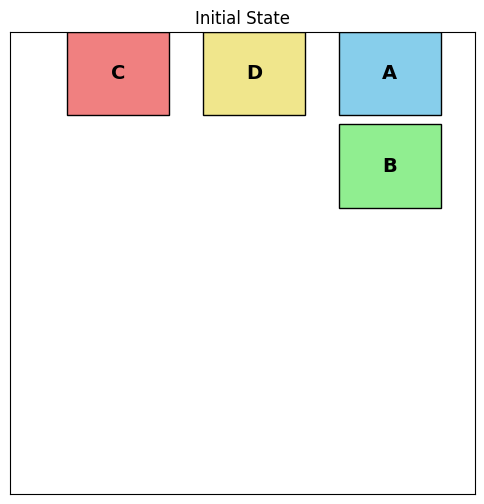

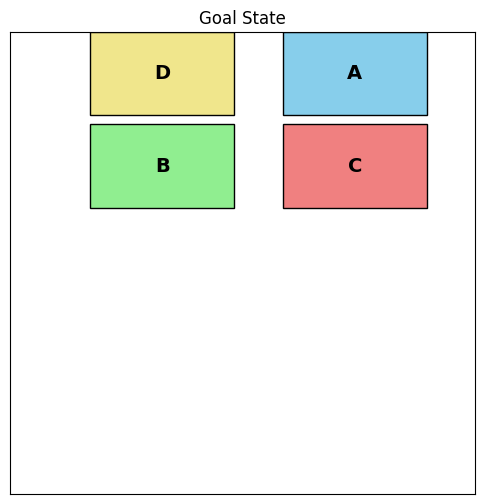


Executing:
Executing: PICKUP(C)
Executing: PUTDOWN(C)
Executing: UNSTACK(B,A)
Executing: PUTDOWN(B)
Executing: PICKUP(C)
Executing: STACK(C,A)
Executing: PICKUP(B)
Executing: STACK(B,D)


In [3]:
import matplotlib.pyplot as plt

def draw_blocks(state_facts, title, blocks):
    stacks = {}
    on_relations = {block: None for block in blocks}
    clear_blocks = set()

    for fact in state_facts:
        if fact.startswith("On("):
            top, bottom = fact[3:-1].split(",")
            on_relations[top.strip()] = bottom.strip()
        elif fact.startswith("OnTable("):
            block = fact[8:-1]
            stacks[block] = [block]
        elif fact.startswith("Clear("):
            clear_blocks.add(fact[6:-1])

    # Build stacks
    for top, bottom in on_relations.items():
        if bottom:
            if bottom in stacks:
                stacks[bottom].append(top)
            else:
                stacks[bottom] = [bottom, top]

    # Draw using matplotlib
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'khaki']
    x = 0
    for base, stack in stacks.items():
        for i, block in enumerate(stack):
            ax.add_patch(plt.Rectangle((x, i), 0.9, 0.9, color=colors[blocks.index(block) % len(colors)], ec='black'))
            ax.text(x + 0.45, i + 0.45, block, ha='center', va='center', fontsize=14, weight='bold')
        x += 1.2

    ax.set_xlim(-0.5, x)
    ax.set_ylim(0, 5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    plt.gca().invert_yaxis()
    plt.show()


# EXAMPLE STATE DATA
blocks = ["A", "B", "C", "D"]

initial_facts = {
    "On(B,A)", "OnTable(A)", "OnTable(C)", "OnTable(D)",
    "Clear(B)", "Clear(C)", "Clear(D)", "HandEmpty"
}

goal_facts = {
    "On(B,D)", "On(C,A)", "OnTable(A)", "OnTable(D)"
}

draw_blocks(initial_facts, "Initial State", blocks)
draw_blocks(goal_facts, "Goal State", blocks)

# To show action sequence (optional):
action_sequence = [
    "PICKUP(C)",
    "PUTDOWN(C)",
    "UNSTACK(B,A)",
    "PUTDOWN(B)",
    "PICKUP(C)",
    "STACK(C,A)",
    "PICKUP(B)",
    "STACK(B,D)"
]

print("\nExecuting:")
for act in action_sequence:
    print(f"Executing: {act}")
